In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm

In [2]:
df = pd.read_csv("D:\Placements\Jupyter notebook\Projects\Loan Approval\loan dataset-20230315T150226Z-001\loan dataset\loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#missing values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

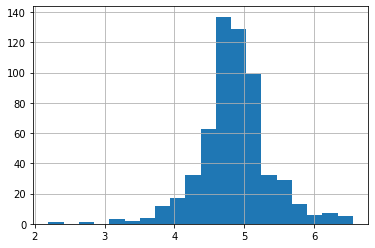

In [5]:
##We'll create one extra column as 'loanAmount_log' where we'll fetch data from the loadAmount column
df['loanAmount_log']=np.log(df['LoanAmount'])
df['loanAmount_log'].hist(bins = 20)

<AxesSubplot:>

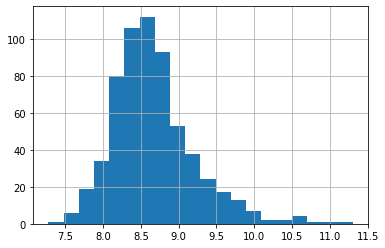

In [6]:
df['TotalIncome']=(df['ApplicantIncome']+df['CoapplicantIncome'])
df['TotalIncome_log']=np.log(df['ApplicantIncome']+df['CoapplicantIncome'])
df['TotalIncome_log'].hist(bins = 20)

In [7]:
df.isnull().sum() ## 0 tells that there is no missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
loanAmount_log       22
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [8]:
## filling null values in all the respective columns
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loanAmount_log = df.loanAmount_log.fillna(df.loanAmount_log.mean())

df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)


df.isnull().sum()



Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
loanAmount_log       0
TotalIncome          0
TotalIncome_log      0
dtype: int64

In [9]:
## now we'll select some coulmns and rows for training and testing
x = df.iloc[:,np.r_[1:5,9:11,13:15]].values
y = df.iloc[:,12].values

In [10]:
x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [11]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [12]:
#finding % of missing values
print("percent of missing gender is %2f%%" %((df['Gender'].isnull().sum()/df.shape[0])*100))

percent of missing gender is 0.000000%


no. of people who take loan as group by gender
Male      502
Female    112
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

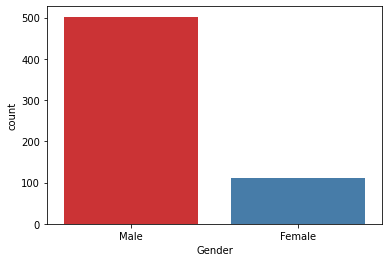

In [13]:
# no. of people who take loan as a group by gender using a plot
print("no. of people who take loan as group by gender")
print(df['Gender'].value_counts())
sns.countplot(x = 'Gender', data = df, palette = 'Set1') #sns.countplot is a method

no. of people who take loan as group by marital status
Yes    401
No     213
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

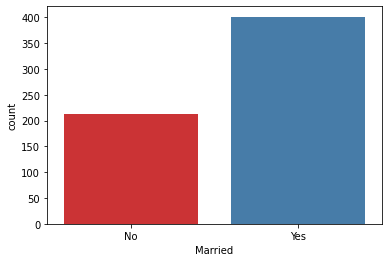

In [14]:
# no. of people who take loan as a group by marital status using a plot
print("no. of people who take loan as group by marital status")
print(df['Married'].value_counts())
sns.countplot(x = 'Married', data = df, palette = 'Set1') #sns.countplot is a method

no. of people who take loan as group by dependencies
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<AxesSubplot:xlabel='Dependents', ylabel='count'>

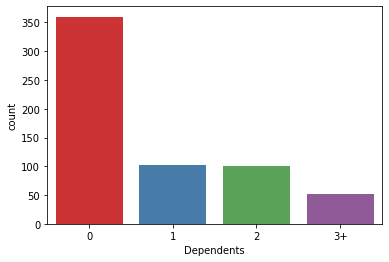

In [15]:
# no. of people who take loan as a group by dependencies using a plot
print("no. of people who take loan as group by dependencies")
print(df['Dependents'].value_counts())
sns.countplot(x = 'Dependents', data = df, palette = 'Set1')

In [16]:
#.........self employed

In [17]:
#.........loan amount

In [18]:
#.........credit history

In [19]:
# splitting into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size = 0.2, random_state = 0) #using this train_test_split method and passing some parameters

from sklearn.preprocessing import LabelEncoder
Labelencoder_x = LabelEncoder()

In [20]:
for i in range(0,5):
    X_train[:,i] = Labelencoder_x.fit_transform(X_train[:,i])
    X_train[:,7] = Labelencoder_x.fit_transform(X_train[:,7])

    
X_train
    

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [21]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [22]:
for i in range(0,5):
    X_test[:,i] = Labelencoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = Labelencoder_x.fit_transform(X_test[:,7])
    
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [23]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,loanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [24]:
Labelencoder_y = LabelEncoder()

y_test = Labelencoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [25]:
# applying standard scalar
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
x_test = ss.fit_transform(X_test)

In [26]:
# lets see which classifier is best for prediction by seeing their accuracy
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
from sklearn import metrics
y_pred = rf_clf.predict(x_test)

print("acc of random forest clf is", metrics.accuracy_score(y_pred, y_test))

y_pred

# here accuracy is generate very less. 1 means loan is approved and 0 means not

acc of random forest clf is 0.7967479674796748


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [28]:
# use of naive bayes 
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = nb_classifier.predict(X_test)
print("acc of gaussianNB is ", metrics.accuracy_score(y_pred, y_test))


acc of gaussianNB is  0.2764227642276423


In [32]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
# Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [34]:
y_pred = dt_clf.predict(X_test)
print("acc of DT is:", metrics.accuracy_score(y_pred, y_test))


acc of DT is: 0.7154471544715447


In [35]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [36]:
# K-neighbours classifier 
from sklearn.neighbors import KNeighborsClassifier
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
y_pred = kn_clf.predict(X_test)
print("acc of KN is:", metrics.accuracy_score(y_pred, y_test))

acc of KN is: 0.5528455284552846


In [38]:
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1])